In [1]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from math import log
import operator
import pandas as pd
import numpy as np

In [2]:
def createDataSet():
    dataSet = [[0, 0, 0, 0, 1,'no'],
            [0, 0, 0, 1, 1,'no'],
            [0, 1, 0, 1, 1,'yes'],
            [0, 1, 1, 0, 0,'yes'],
            [0, 0, 0, 0, 0,'no'],
            [1, 0, 0, 0, 1,'no'],
            [1, 0, 0, 1, 0, 'no'],
            [1, 1, 1, 1, 0, 'yes'],
            [1, 0, 1, 2, 1,'yes'],
            [1, 0, 1, 2, 0,'yes'],
            [2, 0, 1, 2, 1,'yes'],
            [2, 0, 1, 1, 0,'yes'],
            [2, 1, 0, 1, 1,'yes'],
            [2, 1, 0, 2, 0,'yes'],
            [2, 0, 0, 0, 1,'no']]
    labels = ['F1-AGE', 'F2-WORK', 'F3-HOME', 'F4-LOAN', 'F5-MyNew']
    return dataSet, labels

In [3]:
dataset, labels = createDataSet()
labels.append("ANS")

In [4]:
df = pd.DataFrame(np.array(dataset), columns = labels)
df

,F1-AGE,F2-WORK,F3-HOME,F4-LOAN,F5-MyNew,ANS
0,0,0,0,0,1,no
1,0,0,0,1,1,no
2,0,1,0,1,1,yes
3,0,1,1,0,0,yes
4,0,0,0,0,0,no
5,1,0,0,0,1,no
6,1,0,0,1,0,no
7,1,1,1,1,0,yes
8,1,0,1,2,1,yes
9,1,0,1,2,0,yes


In [5]:
"""
執行全部=>創立樹
# majorityCnt => 返回最大計數的類別
# chooseBestFeatureToSplit => 返回最好的欄位索引值
# splitDataSet
"""
def createTree(dataset,labels,featLabels):
    # 單獨抽出 class
    classList = [example[-1] for example in dataset]
    #             no的個數               全部筆數
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #  第一筆的 feature數
    if len(dataset[0]) == 1: # 遍歷完當前數據集
        return majorityCnt(classList)
    print("###>> Do chooseBestFeatureToSplit")
    bestFeat = chooseBestFeatureToSplit(dataset) # 返回最好的欄位索引值
    bestFeatLabel = labels[bestFeat]
    featLabels.append(bestFeatLabel) # 保存最佳欄位名稱
    myTree = {bestFeatLabel:{}} 
    del labels[bestFeat]        # 刪除最好的feature數
    featValue = [example[bestFeat] for example in dataset] # 取出某列的所有值
    uniqueVals = set(featValue)  # 變成唯一值
    for value in uniqueVals:
        sublabels = labels[:]
        # TODO 遞迴
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataset,bestFeat,value),sublabels,featLabels)
    print("myTree",myTree)
    return myTree


In [6]:
"""
# 返回最大計數的類別
"""
def majorityCnt(classList):
    # class 類別計算數目 => {'no': 6, 'yes': 9}
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():classCount[vote] = 0
        classCount[vote] += 1
    # [('yes', 9), ('no', 6)]
    """
    operator.itemgetter(1)
    對對象的第num維數據進行操作獲取。
    返回的並不是一個具體的數字，而是一個函數
    """
    """
    terable -- 可迭代對象。
    cmp -- 比較的函數，這個具有兩個參數，參數的值都是從可迭代對像中取出，此函數必須遵守的規則為，大於則返回1，小於則返回-1，等於則返回0。
    key -- 主要是用來進行比較的元素，只有一個參數，具體的函數的參數就是取自於可迭代對像中，指定可迭代對像中的一個元素來進行排序。
    reverse -- 排序規則，reverse = True 降序， reverse = False 升序（默認）。
    """
    sortedclassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedclassCount[0][0] # 返回最大計數的類別

In [7]:
"""
# 返回最好的欄位索引值
calcShannonEnt =>返回０- every class prop
splitDataSet => 
"""

def chooseBestFeatureToSplit(dataset):
    # 抓取欄位
    numFeatures = len(dataset[0]) - 1
    baseEntropy = calcShannonEnt(dataset)  # 基礎熵值
    bestInfoGain = 0
    bestFeature = -1
    # 各　feature 輪流處理
    for i in range(numFeatures):
        print("處理第{}欄位".format(i))
        # 每個feature的 list
        featList = [example[i] for example in dataset]
        # 去重複
        uniqueVals = set(featList) 
        newEntropy = 0
        for val in uniqueVals:
            print(">> Do splitDataSet >>>> splitDataSet ")
            #                   資料集,第幾個feature,每一個欄位的 uniqueVals    
            subDataSet = splitDataSet(dataset,i,val) # 得到 第i個feature後的所有值
            #       特定狀況筆數 / 總比數
            prob = len(subDataSet)/float(len(dataset))
            print(subDataSet)
            print(">> Do chooseBestFeatureToSplit >>>> calcShannonEnt|丟入數據: ")
            
            
            newEntropy += prob * calcShannonEnt(subDataSet)   # 加權概率值*熵值
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i	
    return bestFeature

In [8]:
def splitDataSet(dataset,axis,val):
    """
    
    dataset: 資料集
    axis:　第幾個feature
    val: 每一個欄位的 uniqueVals
    """
    retDataSet = []
    # 每筆資料
    for featVec in dataset:
        if featVec[axis] == val:
            reducedFeatVec = featVec[:axis]
            # 存儲 第axis個feature後的值
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [9]:
"""
返回０- every class prop
"""
def calcShannonEnt(dataset):
    """
    class 分別個數/總量
    """
    print("======>> 執行計算熵值!! ")
    numexamples = len(dataset) # 總筆數
    # 統計每個標籤出現個數
    labelCounts = {}
    for featVec in dataset:
        currentlabel = featVec[-1] # 目前 class
        if currentlabel not in labelCounts.keys():
            labelCounts[currentlabel] = 0
        labelCounts[currentlabel] += 1
    print("labelCounts=> ",labelCounts)
    shannonEnt = 0
    for key in labelCounts:
        # 各類別機率
        prop = float(labelCounts[key])/numexamples
        shannonEnt -= prop*log(prop,2) # base -- 可选，底数，默认为 e。
    print("====== 計算熵值執行結束 ======")
    return shannonEnt

In [10]:
"""
得到決策樹葉節點數目
myTree: {'F3-HOME': {0: {'F2-WORK': {0: 'no', 1: 'yes'}}, 1: 'yes'}}
"""
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = next(iter(myTree))
    secondDict = myTree[firstStr]
    for key in secondDict.keys(): # dict_keys([0, 1])
        # <class 'dict'> => 表示裡面還有一層要遞迴算葉子
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

In [11]:
"""
得到決策樹層數
"""
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = next(iter(myTree))
    secondDict = myTree[firstStr]
    for key in secondDict.keys(): # dict_keys([0, 1])
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [12]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")
    font = FontProperties(fname=r"c:\windows\fonts\simsunb.ttf", size=14)
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
        xytext=centerPt, textcoords='axes fraction',
        va="center", ha="center", bbox=nodeType, arrowprops=arrow_args, FontProperties=font)


In [13]:
def plotMidText(cntrPt, parentPt, txtString):
    """
    cntrPt:
    parentPt:
    txtString: 葉子名稱
    """
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [14]:
def plotTree(myTree, parentPt, nodeTxt):
    decisionNode = dict(boxstyle="sawtooth", fc="0.8")
    leafNode = dict(boxstyle="round4", fc="0.8")
    numLeafs = getNumLeafs(myTree)  # 得到決策樹葉節點數目
    depth = getTreeDepth(myTree)    # 得到決策樹層數
    firstStr = next(iter(myTree))
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [15]:
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')  #創建fig
    fig.clf() #清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops) #去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))  #得到決策樹葉節點數目
    plotTree.totalD = float(getTreeDepth(inTree)) #得到決策樹層數
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0; #x偏移
    plotTree(inTree, (0.5,1.0), '') #畫決策樹
    plt.show()

###>> Do chooseBestFeatureToSplit
======>> 執行計算熵值!! 
labelCounts=>  {'no': 6, 'yes': 9}
====== 計算熵值執行結束 ======
處理第0欄位
>> Do splitDataSet >>>> splitDataSet 
[[0, 0, 0, 1, 'no'], [0, 0, 1, 1, 'no'], [1, 0, 1, 1, 'yes'], [1, 1, 0, 0, 'yes'], [0, 0, 0, 0, 'no']]
>> Do chooseBestFeatureToSplit >>>> calcShannonEnt|丟入數據: 
======>> 執行計算熵值!! 
labelCounts=>  {'no': 3, 'yes': 2}
====== 計算熵值執行結束 ======
>> Do splitDataSet >>>> splitDataSet 
[[0, 0, 0, 1, 'no'], [0, 0, 1, 0, 'no'], [1, 1, 1, 0, 'yes'], [0, 1, 2, 1, 'yes'], [0, 1, 2, 0, 'yes']]
>> Do chooseBestFeatureToSplit >>>> calcShannonEnt|丟入數據: 
======>> 執行計算熵值!! 
labelCounts=>  {'no': 2, 'yes': 3}
====== 計算熵值執行結束 ======
>> Do splitDataSet >>>> splitDataSet 
[[0, 1, 2, 1, 'yes'], [0, 1, 1, 0, 'yes'], [1, 0, 1, 1, 'yes'], [1, 0, 2, 0, 'yes'], [0, 0, 0, 1, 'no']]
>> Do chooseBestFeatureToSplit >>>> calcShannonEnt|丟入數據: 
======>> 執行計算熵值!! 
labelCounts=>  {'yes': 4, 'no': 1}
====== 計算熵值執行結束 ======
處理第1欄位
>> Do splitDataSet >>>> splitDataSet 
[[0, 0

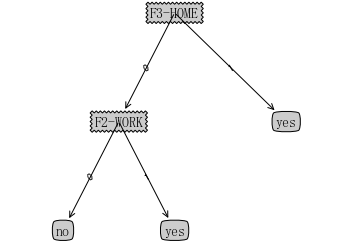

In [16]:
dataset, labels = createDataSet()
featLabels = []
myTree = createTree(dataset,labels,featLabels)
createPlot(myTree)
